In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import sys
sys.path.append('.')
import PQS_solver_v2 as PQS
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math
from matplotlib.ticker import MultipleLocator

In [2]:
N_m_strength = 1 # Number if different magnetic momnent strengths
N_rabi = 5 # Number of different angles of the magnetic moment
N_states = N_m_strength * N_rabi # number of different singnal states
t_gamma = 50 # time of the simulation
gamma = 1 # characteristic decay rate
t = t_gamma / gamma # time of the simulation
dt = 0.01 # time step of the simulation
N_t = int(t / dt + 1) # number of time steps
times = np.linspace(0, t, N_t, endpoint=True) # time steps
mu1 = 1 # magnetic moment of the qubit
mu2 = 1 # magnetic moment of thee_op = lambda i : [c_out_1_1_e(i) + c_out_1_2_e(i).dag(), c_out_1_1_e_dag(i) + c_out_1_2_e_dag(i).dag()] qubit
seed_signal = 46 # seed for random number generator for the signal
seed_simulation = 9 # seed for random number generator for the simulation
t_signal_leadin = 1 # time for the stocastic nature of the signal to not be at 0 as the begining of the simulation
gamma_decay = gamma # decay rate of qubit out of cavityFisher_information_error[0, 0], label='Fisher information error', color='black', alpha=0.5
gamma_phi = gamma # dephasing rate of qubit
m_min, m_max = 4.9, 5.1 # range of the magnetic moment
rabi_min, rabi_max = 1, 3#-1/10 * np.pi, 1/10 * np.pi # range of the angle of the magnetic moment
rabi_step = (rabi_max - rabi_min) / N_rabi
N_t_leadin = int(t_signal_leadin / dt) # number of time steps for the leadin time
# true angle of the magnetic moment
methode = 'Kraus' # methode used for the ODE solver
p = 0.02 * gamma # transition rate 

field_type = 'uniform' # 'dipole' type of sensing field


save=False


dephase_strength = 0.00
entaglement = 'rabi' # 'entangled' or 'seperable' entangled state




beta_1 = np.array([1, 0, 0]) * 0.4# amplitude of driving field
beta_2 = np.array([0, 1, 0]) * 0.4# amplitude of driving field

cupling_strength = 0.0


        

    

# Simulate signal

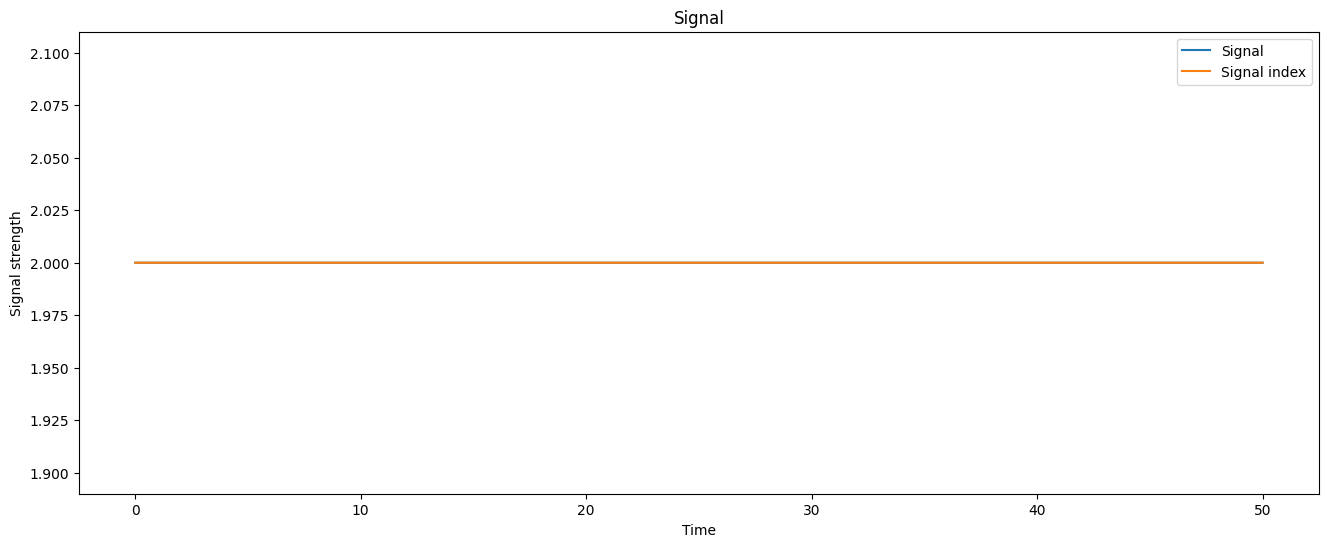

In [3]:
signal_type = 'constant'

rabi = 1
detuning = 0#1.43
gamma_rabi = 0.55

r_signal = np.random.default_rng(seed_signal) # random number generator for the signal

st = 0#0.05#0.003 # to regulate the transtion rate between HMM states

def gennerate_r_next_neighbour_jump(N, st):
    r = np.eye(N, k=0) * (1 - 2 * st)
    r += np.eye(N, k=1) * st
    r += np.eye(N, k=-1) * st
    r[0, 0] = 1 - st
    r[-1, -1] = 1 - st
    return r

r_HMM = gennerate_r_next_neighbour_jump(N_states, st / rabi_step)



# generate the signal
r_HMM_sim = np.zeros((N_states, N_states))

for i in range(N_states):
    for j in range(N_states):
        if i != j:
            r_HMM_sim[i, j] = r_HMM[i, j] * dt

for i in range(N_states):
    r_HMM_sim[i, i] = 1 - np.sum(r_HMM_sim[i, :])








t_B_1 = 0
delta_t_B_1 = t 
 
rabi_n_posible = np.linspace(rabi_min, rabi_max, N_rabi, endpoint=True)

rabi_n_index_0 = int(N_rabi / 2)

rabi_n_0 = rabi_n_posible[rabi_n_index_0]

rabi_n_list = np.zeros(N_t + N_t_leadin)
rabi_n_list_index = np.zeros(N_t + N_t_leadin, dtype=int)

rabi_n_list_index[0] = rabi_n_index_0
rabi_n_list[0] = rabi_n_0

# generate the signal
for i in range(1, N_t_leadin + N_t):
    q = r_signal.random()
    prob_sum = 0
    nr = 0
    while prob_sum < q:
        prob_sum += r_HMM_sim[rabi_n_list_index[i - 1], nr]
        nr += 1
    rabi_n_list_index[i] = nr - 1


rabi_n_list = rabi_n_posible[rabi_n_list_index]


rabi_n = lambda i: rabi_n_list[i]

rabi_n_index = lambda i: rabi_n_list_index[i]





#Delta_n_1 = np.ones(N_t) * B_1
#Delta_n_2 = np.ones(N_t) * B_1 * 0
#Delta_n_1_0 = np.ones(N_t)
#Delta_n_2_0 = np.ones(N_t)
#Delta_n_1 = np.linspace(-B_1, B_1, N_t, endpoint=True)

fig, ax = plt.subplots(1, figsize=(16, 6))

t_plot = np.linspace(0, t * gamma, N_t)

Blues = plt.get_cmap('Blues')

t_index = np.arange(0, N_t, 1)

ax.plot(t_plot, rabi_n(t_index), label='Signal')
ax.plot(t_plot, rabi_n_index(t_index), label='Signal index')


ax.set_title('Signal')
ax.set_xlabel('Time')
ax.set_ylabel('Signal strength')

#ax[1].set_title('Wiener process')
#ax[1].plot(t_plot, dW)

ax.legend()
plt.show()


# Simulate detection record

In [4]:
gamma_purcell = lambda Delta_n : 2 * g ** 2 * kappa / (kappa ** 2 + (Delta_r - Delta_n) ** 2)

#N = 1
kappa = 10 * gamma # amplitude decay rate of cavity field due to transmission of the output field
kappa_1 = kappa # amplitude decay rate of cavity field due to loss
Delta_r = 0 # cavity detuning
g = 5 * gamma # coupling strength
#alpha = np.sqrt(2 * kappa) * beta / (kappa + 1j * Delta_r)



#noise_factor = 0.004
noise_factor = 1

N_dim = 2


# be warned. Since jmat is used, the factor of 1/2 is inside the jmat function
sigma_z = qt.jmat(N_dim/2 - 1/2, 'z')#qt.sig maz()# Pauli-Z operator for qubit
sigma_x = qt.jmat(N_dim/2 - 1/2, 'x')#qt.sigmax() # Pauli-X operator for qubit
sigma_y = qt.jmat(N_dim/2 - 1/2, 'y')#qt.sigmay() # Pauli-Y operator for qubit
sigma_p = qt.jmat(N_dim/2 - 1/2, '+')#qt.sigmap() # raising operator for qubit
sigma_m = qt.jmat(N_dim/2 - 1/2, '-')#qt.sigmam() # lowering operator for qubit



sigma_z_1 = qt.tensor(sigma_z, qt.qeye(N_dim))
sigma_x_1 = qt.tensor(sigma_x, qt.qeye(N_dim))
sigma_y_1 = qt.tensor(sigma_y, qt.qeye(N_dim))
sigma_p_1 = qt.tensor(sigma_p, qt.qeye(N_dim))
sigma_m_1 = qt.tensor(sigma_m, qt.qeye(N_dim))

sigma_z_2 = qt.tensor(qt.qeye(N_dim), sigma_z)
sigma_x_2 = qt.tensor(qt.qeye(N_dim), sigma_x)
sigma_y_2 = qt.tensor(qt.qeye(N_dim), sigma_y)
sigma_p_2 = qt.tensor(qt.qeye(N_dim), sigma_p)
sigma_m_2 = qt.tensor(qt.qeye(N_dim), sigma_m)


c_x = qt.Qobj([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], dims=[[N_dim, N_dim], [N_dim, N_dim]])
c_y = qt.Qobj([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, -1j], [0, 0, 1j, 0]], dims=[[N_dim, N_dim], [N_dim, N_dim]])

haddamard = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

haddamard_1 = qt.tensor(qt.Qobj(haddamard), qt.qeye(N_dim))
haddamard_2 = qt.tensor(qt.qeye(N_dim), qt.Qobj(haddamard))


state_0 = qt.tensor(qt.maximally_mixed_dm(N_dim), qt.maximally_mixed_dm(N_dim))#qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 0))
#state_0 = qt.Qobj(1/4 * np.array([[1, 1, 1, 1]
#                                 ,[1, 1, 1, 1]
#                                 ,[1, 1, 1, 1]
#                                 ,[1, 1, 1, 1]]), dims=[[N_dim, N_dim], [N_dim, N_dim]])

#rho_0 = state_0





c_single = lambda i : sigma_x * dephase_strength + sigma_y * dephase_strength + sigma_z * dephase_strength


c_out_single = lambda i : beta_1[0] * sigma_x + beta_1[1] * sigma_y + beta_1[2] * sigma_z
c_out_single_dag = lambda i : beta_1[0] * sigma_x.dag() + beta_1[1] * sigma_y.dag() + beta_1[2] * sigma_z.dag()
c_out_rabi = lambda i: np.sqrt(gamma_rabi) * sigma_m


c_1 = lambda i : sigma_x_1 * dephase_strength + sigma_y_1 * dephase_strength + sigma_z_1 * dephase_strength #sigma_m_1 * np.sqrt(gamma_purcell(Delta_n_1[i]))
c_single = lambda i : sigma_x * dephase_strength + sigma_y * dephase_strength + sigma_z * dephase_strength
#c_2_1 = lambda i : sigma_y_1 * 0.1  #np.sqrt(gamma_decay) * sigma_m_1 # decay of qubit out of the cavity
#c_3_1 = lambda i : sigma_z_1 * 0.1#np.sqrt(gamma_phi / 2) * sigma_z_1 # dephasing of qubit
c_out_1 = lambda i : beta_1[0] * sigma_x_1 + beta_1[1] * sigma_y_1 + beta_1[2] * sigma_z_1
c_out_1_e = lambda i : beta_1[0] / 2 * (sigma_x_1 + sigma_x_2) #+ beta_1[1] * (sigma_y_1 + sigma_y_2) + beta_1[2] * (sigma_z_1 + sigma_z_2)
c_out_1_bell = lambda i : beta_1[0] * sigma_z_1 * haddamard_1 * c_x
#c_out_2_1 = lambda i : beta * sigma_y_1
c_out_1_dag = lambda i : beta_1[0] * sigma_m_1.dag() + beta_1[1] * sigma_m_1.dag() + beta_1[2] * sigma_z_1.dag()
c_out_1_e_dag = lambda i : beta_1[0] / 2 * (sigma_x_1 + sigma_x_2).dag() #+ beta_2[1] * (sigma_y_1 + sigma_y_2).dag() + beta_2[2] * (sigma_z_1 + sigma_z_2).dag()
c_out_1_bell_dag = lambda i : beta_1[0] * sigma_z_1.dag() * haddamard_1.dag() * c_x.dag()

#c_out_2_1_dag = lambda i : beta * sigma_y_1.dag()



c_2 = lambda i : sigma_x_2 * dephase_strength + sigma_y_2 * dephase_strength + sigma_z_2 * dephase_strength #sigma_m_2 * np.sqrt(gamma_purcell(Delta_n_2[i]))
#c_2_2 = lambda i : sigma_y_2 * 0.1 #np.sqrt(gamma_decay) * sigma_m_2 # decay of qubit out of the cavity
#c_3_2 = lambda i : sigma_z_2 * 0.1 #np.sqrt(gamma_phi / 2) * sigma_z_2 # dephasing of qubit
c_out_2 = lambda i : beta_2[0] * sigma_x_2 + beta_2[1] * sigma_y_2 + beta_2[2] * sigma_z_2
c_out_2_e = lambda i : beta_2[1] / 2 * (sigma_y_1 + sigma_y_2) #+ beta_2[1] * (c_y)
c_out_2_bell = lambda i : beta_2[1] * sigma_z_2 * c_x

c_out_2_dag = lambda i : beta_2[0] * sigma_x_2.dag() + beta_2[1] * sigma_y_2.dag() + beta_2[2] * sigma_z_2.dag()
c_out_2_e_dag = lambda i : beta_2[1] / 2 * (sigma_y_1 + sigma_y_2).dag() #+ beta_2[1] * (c_y).dag()
c_out_2_bell = lambda i : beta_1[1] * sigma_z_2.dag() * haddamard_1.dag() * c_x.dag()
total_spin_z_1 = lambda i : sigma_z_1 * sigma_z_1
total_spin_z_2= lambda i : sigma_z_2 * sigma_z_2

total_spin_z = lambda i : (sigma_z_1 + sigma_z_2) * (sigma_z_1 + sigma_z_2)
total_spin = lambda i :   2 * (3/4 * qt.qeye_like(sigma_x_1) + sigma_x_1 * sigma_x_2 + sigma_y_1 * sigma_y_2 + sigma_z_1 *  sigma_z_2) #1/2 * ((sigma_x_1 + sigma_y_1 + sigma_z_1) + (sigma_x_2 + sigma_y_2 + sigma_z_2)) * ((sigma_x_1 + sigma_y_1 + sigma_z_1) + (sigma_x_2 + sigma_y_2 + sigma_z_2))##
#sigma_x_1 + sigma_x_2 + sigma_y_1 + sigma_y_2 + sigma_z_1 + sigma_z_2

triplet_state_1 = qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 1))
triplet_state_2 = qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 0))
triplet_state_3 = 1/np.sqrt(2) * (qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 0)) + qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 1)))

triplet_rho_1 = triplet_state_1 * triplet_state_1.dag()
triplet_rho_2 = triplet_state_2 * triplet_state_2.dag()
triplet_rho_3 = triplet_state_3 * triplet_state_3.dag()

singlet_state = 1/np.sqrt(2) * (qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 0)) - qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 1)))
singlet_rho = singlet_state * singlet_state.dag()


phi_p = 1/np.sqrt(2) * (qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 0)) + qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 1)))
phi_m = 1/np.sqrt(2) * (qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 0)) - qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 1)))
psi_p = 1/np.sqrt(2) * (qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 1)) + qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 0)))
psi_m = 1/np.sqrt(2) * (qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 1)) - qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 0)))

phi_p_rho = phi_p * phi_p.dag()
phi_m_rho = phi_m * phi_m.dag()
psi_p_rho = psi_p * psi_p.dag()
psi_m_rho = psi_m * psi_m.dag()







rho_0 = triplet_rho_1 + triplet_rho_2 + triplet_rho_3#state_0

rho_0 = rho_0 / rho_0.norm()
if entaglement == 'single':
    rho_0 = qt.maximally_mixed_dm(N_dim)
if entaglement == 'rabi':
    rho_0 = qt.basis(N_dim, 0) * qt.basis(N_dim, 0).dag()



#print('triplet_state_1', triplet_state_1)
#print('triplet_state_2', triplet_state_2)
#print('triplet_state_3', triplet_state_3)
#print('singlet_state', singlet_state)       
#print('triplet state 1 total spin state', total_spin(0) * triplet_state_1)
#print('triplet state 2 total spin state', total_spin(0) * triplet_state_2)
#print('triplet state 3 total spin state', total_spin(0) * triplet_state_3)
#print('singlet state total spin state', total_spin(0) * singlet_state)



#print('triplet state 1 total spin', (total_spin(0) * triplet_state_1).norm())
#print('triplet state 2 total spin', (total_spin(0) * triplet_state_2).norm())
#print('triplet state 3 total spin', (total_spin(0) * triplet_state_3).norm())
#print('singlet state total spin', (total_spin(0)  * singlet_state).norm())

#print('total_spin', total_spin(0))
#print('total_spin_dag', total_spin(0).dag())




#c_ops = [[c_1_1(i), c_2_1(i), c_3_1(i), c_1_2(i), c_2_2(i), c_3_2(i)] for i in range(N_t)]
#c_ops = [[c_1_1(i), c_1_2(i)] for i in range(N_t)]





c_op = lambda i : [c_1(i), c_2(i)]

if entaglement == 'entaglement':
    sc_op = lambda i : [c_out_1_e(i), c_out_2_e(i)]
    e_op = lambda i : [c_out_1_e(i) + c_out_2_e(i).dag(), c_out_1_e_dag(i) + c_out_2_e_dag(i).dag(), total_spin(i), 
                       sigma_x_1, sigma_y_1, sigma_x_2, sigma_y_2, sigma_x_1 + sigma_x_2, sigma_y_1 + sigma_y_2, triplet_rho_1,
                       triplet_rho_2, triplet_rho_3, singlet_rho, 1j * (sigma_z_1 + sigma_z_2), psi_m_rho, psi_p_rho, phi_m_rho, phi_p_rho, sigma_z_1, sigma_z_2]
elif entaglement == 'bell':
    sc_op = lambda i : [c_out_1_bell(i), c_out_2_bell(i)]
    e_op = lambda i : [c_out_1_bell(i) + c_out_2_bell(i).dag(), c_out_1_e_dag(i) + c_out_2_e_dag(i).dag(), total_spin(i), 
                       sigma_x_1, sigma_y_1, sigma_x_2, sigma_y_2, sigma_x_1 + sigma_x_2, sigma_y_1 + sigma_y_2, triplet_rho_1,
                       triplet_rho_2, triplet_rho_3, singlet_rho, 1j *(sigma_z_1 + sigma_z_2), psi_m_rho, psi_p_rho, phi_m_rho, phi_p_rho]
elif entaglement == 'single':
    c_op = lambda i : [c_single(i)]
    sc_op = lambda i : [c_out_single(i)]
    e_op = lambda i : [c_out_single(i) + c_out_single(i).dag(), sigma_x, sigma_y, sigma_z]
elif entaglement == 'rabi':
    c_op = lambda i : [c_single(i)]
    sc_op = lambda i : [c_out_rabi(i)]
    e_op = lambda i : [c_out_rabi(i) + c_out_rabi(i).dag(), sigma_x, sigma_y, sigma_z]
else:
    sc_op = lambda i : [c_out_1(i), c_out_2(i)]
    e_op = lambda i : [c_out_1(i) + c_out_2(i).dag(), c_out_1_dag(i) + c_out_2_dag(i).dag(), total_spin(i), 
                       sigma_x_1, sigma_y_1, sigma_x_2, sigma_y_2, sigma_x_1 + sigma_x_2, sigma_y_1 + sigma_y_2, triplet_rho_1,
                       triplet_rho_2, triplet_rho_3, singlet_rho, 1j * (sigma_z_1 + sigma_z_2), psi_m_rho, psi_p_rho, phi_m_rho, phi_p_rho]



c_ops = [c_op(i) for i in range(N_t)]


sc_ops = [sc_op(i) for i in range(N_t)]

e_ops = [e_op(i) for i in range(N_t)]




H_1 = lambda i : 1/2 * (sigma_z_1 * rabi_n[i])# + sigma_y_1 * Delta_n_1[i, 1] + sigma_z_1 * Delta_n_1[i, 2]) 
H_2 = lambda i : 1/2 * (sigma_z_2 * rabi_n[i]) #+ sigma_y_2 * Delta_n_2[i, 1] + sigma_z_2 * Delta_n_2[i, 2])
H_cupling = lambda i : cupling_strength * (sigma_x_1 * sigma_x_2 + sigma_y_1 * sigma_y_2 + sigma_z_1 * sigma_z_2)
H_single = lambda i : 1/2 * (sigma_z * rabi_n[i])# + sigma_y * Delta_n_1[i, 1] + sigma_z * Delta_n_1[i, 2])
H_rabi = lambda i : rabi/2 * sigma_x + detuning/2 * sigma_z 

if entaglement == 'single':
    H_pqs = [H_single(i) for i in range(N_t)]
if entaglement == 'rabi':
    H_pqs = [H_rabi(i) for i in range(N_t)]
else:
    H_pqs = [H_1(i) + H_2(i) + H_cupling(i) for i in range(N_t)]


#Experiment = PQS.Experiment_simulation(H_pqs, rho_0, times, c_ops=c_ops, sc_ops=sc_ops, e_ops=e_ops, timedependent_H=True) # not very elegant that one need to write the 1 at N_states
#Experiment.solve(noise_factor=noise_factor, methode=methode)
    
    




# Solvatore system

/home/sk0rt3/Documents/Masters/2024-2025/Masters_thesis/Code/Master_thesis/PQS_solver_v2.py:430: ComplexWarning: Casting complex values to real discards the imaginary part
  dY[i] = np.sqrt(nu[i]) * dw[i] + nu[i] * self.expectation_value(sc_ops_w[i] + sc_ops_w[i].dag(), rho) * self.dt
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


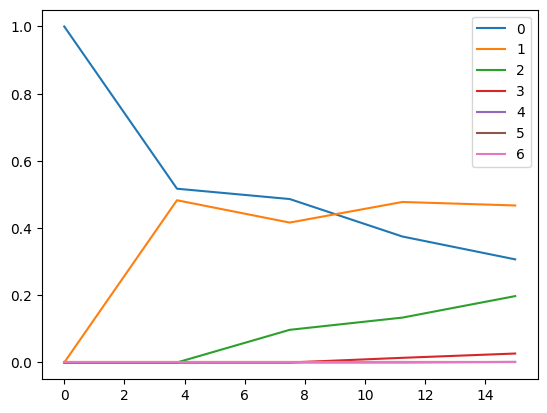

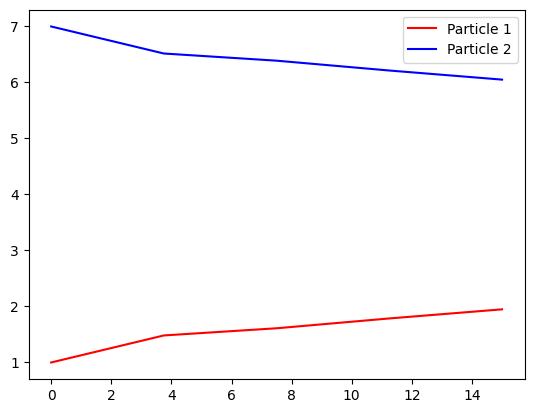

In [5]:
from qutip import fock, tensor, fock_dm, qeye, Qobj

T = 15
N_times = 5

N = 7
J = 1
ct = int(N/2)    #central site

#Transition operators for the two atoms, +/- 1 position
tp_ops = [fock(N,i+1)*fock(N,i).dag() for i in range(N-1)]
tp1 = tensor(sum(tp_ops), qeye(N))
tm1 = tp1.dag()
tp2 = tensor(qeye(N), sum(tp_ops))
tm2 = tp2.dag()

K = J*(tp1+tm1+tp2+tm2)      #Kinetic part for the two atoms

#Repulsive potential
V0 = 10
V = [V0*tensor(fock_dm(N,i), fock_dm(N,i)) for i in range(N)]
V = sum(V)

H_sol = lambda i: K+V
#H_sol = [H(i) for i in range(N_times)]

rho0 = tensor(fock_dm(N,0), fock_dm(N,N-1))

gamma = 1
probed_n = ct
sc_op_sol = lambda i: np.sqrt(gamma)*(tensor(fock_dm(N,probed_n),qeye(N)) + tensor(qeye(N),fock_dm(N,probed_n)) - tensor(fock_dm(N,probed_n),fock_dm(N,probed_n)))
sc_ops_s = lambda i: [sc_op_sol(i)]
#sc_ops_s = [sc_opss(i) for i in range(N_times)]

#measurment_strength = 0.1
#c_w = lambda i : sigma_z * measurment_strength
#sc_op_w = lambda i : [c_w(i)]
#sc_ops_w = [sc_op_w(i) for i in range(N_t)]

#sc_ops_s = [sc_opss for i in range(N_times)]
e_opss = []

focks = [(i+1)*fock_dm(N,i) for i in range(N)]
for i in range(N):
    e_opss.append(tensor(fock_dm(N,i),qeye(N)))
for i in range(N):
    e_opss.append(tensor(qeye(N),fock_dm(N,i)))

eigenstates = []
for k in range(1,N+1):
    eig_k = 0
    for n in range(1,N+1):
        eig_k += np.sin(np.pi*k*n/(N+1))*fock(N,n-1)
    eig_k = np.sqrt(2/(N+1))*eig_k  
    eigenstates.append(eig_k)
for i in range(N):
    e_opss.append(tensor(eigenstates[i]*eigenstates[i].dag(), qeye(N)))
for i in range(N):
    e_opss.append(tensor(qeye(N), eigenstates[i]*eigenstates[i].dag()))

focks = [(i+1)*fock_dm(N,i) for i in range(N)]

#Expectation positions for the 2 particles
e_opss.append(tensor(sum(focks),qeye(N)))
e_opss.append(tensor(qeye(N),sum(focks)))

e_ops_s = lambda i : e_opss
#e_ops_sol = [e_ops_s(i) for i in range(N_times)]
#e_op = lambda i : [sigma_z]
#e_ops = [e_op(i) for i in range(N_t)]

tlist = np.linspace(0,T,N_times)

gamma_decay = 0.0
c_c = lambda i : qt.qzero_like(rho0)
sc_ops_c = lambda i : [c_c(i)]
#sc_ops_c = [sc_op_c(i) for i in range(N_times)]

dec = 0
c_dec = lambda i : qt.qzero_like(rho0)#sigma_m * dec
c_ops = lambda i : [c_dec(i)]
#c_ops = [c_op(i) for i in range(N_times)]


#result = meq_solve(H,rho0,tlist, sc_ops=sc_opss, e_ops=e_opss, ntraj=1)
sollatore = PQS.Experiment_simulation(H_sol, rho0, tlist, sc_ops_w=sc_ops_s, c_ops=c_ops, sc_ops_c=sc_ops_c, e_ops=e_ops_s)
sollatore.solve_mixed()

plt.figure()
for i in range(N):
    plt.plot(tlist, sollatore.expectation[:, i])
plt.legend([i for i in range(N)])


#Expected positions
plt.figure()
x1 = sollatore.expectation[:, 4*N]
x2 = sollatore.expectation[:, 4*N+1]
plt.plot(tlist, x1, 'r')
plt.plot(tlist, x2, 'b')
plt.legend(["Particle 1", "Particle 2"])

# Test wiener solve

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00


/tmp/ipykernel_974096/4596519.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  average[i] = sollatore.expectation.flatten()


Total run time:   1.08s


Text(0.5, 1.0, '1: Wiener process, 0: Counting')

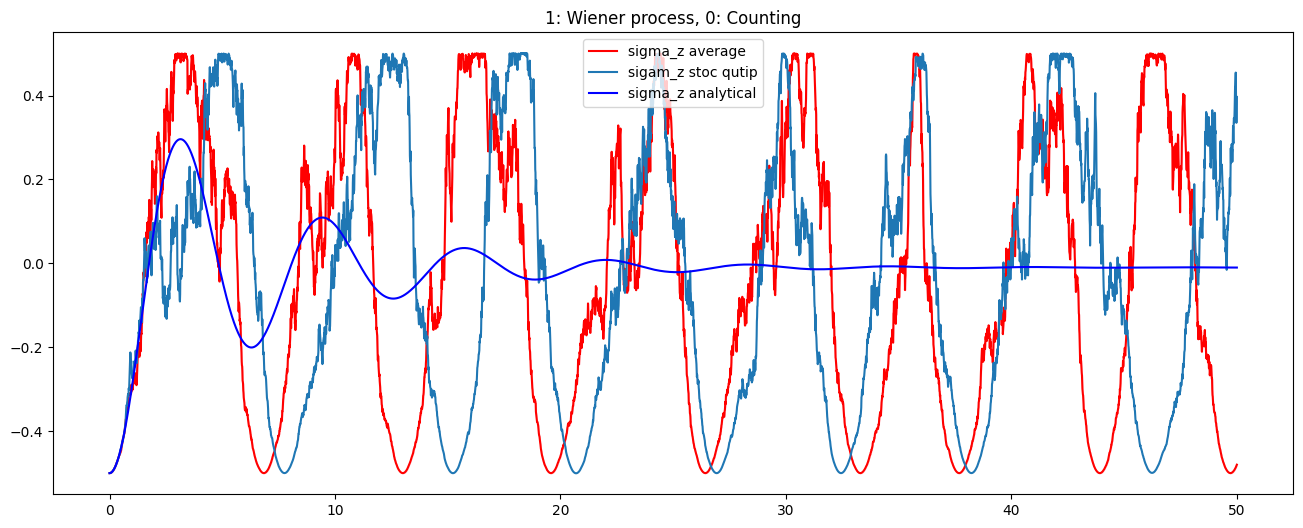

In [6]:
def average_test_wiener(N_average):
    average = np.zeros((N_average, N_t))
    for i in range(N_average):
        sollatore = PQS.Experiment_simulation(H_rabi, rho_0, times, c_ops=c_ops, sc_ops_w=sc_ops_w, sc_ops_c=sc_ops_c, e_ops=e_ops)
        sollatore.solve_mixed()
        average[i] = sollatore.expectation.flatten()
    return np.mean(average, axis=0), np.std(average, axis=0) / np.sqrt(N_average)


alpha = 0 
phi = np.pi/2

gamma_decay = 0.2
1
dec = 0
c_dec = lambda i : sigma_m * np.sqrt(dec)
c_ops = lambda i : [c_dec(i)]
#c_ops = [c_op(i) for i in range(N_t)]


measurment_strength = 1
c_w = lambda i : np.sqrt((1 - alpha) * gamma_decay) * sigma_m * np.exp(1j * phi)
sc_ops_w = lambda i : [c_w(i)]
#sc_ops_w = [sc_op_w(i) for i in range(N_t)]



c_c = lambda i : sigma_m * np.sqrt(gamma_decay * alpha)
sc_ops_c = lambda i : [c_c(i)]
#sc_ops_c = [sc_op_c(i) for i in range(N_t)]


e_ops = lambda i : [sigma_z]
#e_ops = [e_op(i) for i in range(N_t)]


rho_0 = qt.basis(N_dim, 1) * qt.basis(N_dim, 1).dag()


rabi = 2
detuning = 0

H_rabi = lambda i : rabi_n(i)/2 * sigma_x + detuning/2 * sigma_z 
#H_pqs = [H_rabi(i) for i in range(N_t)]





c_ops_analytical = [c_dec(0), c_c(0), c_w(0)]


#wiener = PQS.Experiment_simulation(H_pqs, rho_0, times, c_ops=c_ops, sc_ops_w=sc_ops_w, sc_ops_c=sc_ops_c, e_ops=e_ops) # not very elegant that one need to write the 1 at N_states

#wiener.solve_mixed()

N_average = 1

wiener_average, wiener_std = average_test_wiener(N_average)

stoc_solution = qt.smesolve(H_rabi(0), rho_0, times, c_ops=c_ops(0), sc_ops=sc_ops_w(0), e_ops=e_ops(0), ntraj=N_average)
fig, ax = plt.subplots(1, figsize=(16, 6))

analytical = qt.mesolve(H_rabi(0), rho_0, times, c_ops=c_ops_analytical, e_ops=e_ops(0))

ax.plot(times, wiener_average, label='sigma_z average', color='red')
ax.fill_between(times, wiener_average - wiener_std, wiener_average + wiener_std, alpha=0.5, color='pink')
ax.plot(times, stoc_solution.expect[0], label='sigam_z stoc qutip')
ax.plot(times, analytical.expect[0], label='sigma_z analytical', color='blue')

ax.legend()

ax.set_title(f'{1 - alpha}: Wiener process, {alpha}: Counting')




# Test counting solve

/home/sk0rt3/Documents/Masters/2024-2025/Masters_thesis/Code/Master_thesis/PQS_solver_v2.py:399: ComplexWarning: Casting complex values to real discards the imaginary part
  probability[i] = (self.shot_noise[i] + self.nu_c[i] * self.expectation_value(sc_ops_c[i].dag() * sc_ops_c[i], rho)) * self.dt


100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   1.10s


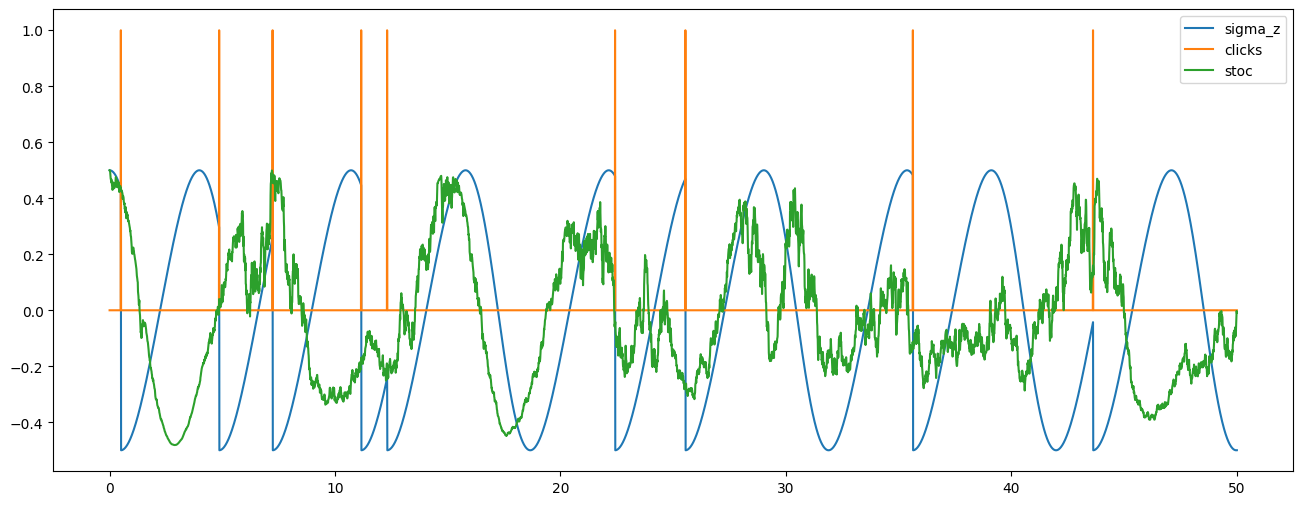

In [7]:
dec = 0
c_dec = lambda i : sigma_m * dec
c_ops = lambda i : [c_dec(i)]
#c_ops = [c_op(i) for i in range(N_t)]


measurment_strength = 0
c_w = lambda i : sigma_z * measurment_strength
sc_ops_w = lambda i : [c_w(i)]
#sc_ops_w = [sc_op_w(i) for i in range(N_t)]


gamma_decay = 0.3
c_c = lambda i : sigma_m * np.sqrt(gamma_decay)
sc_ops_c = lambda i : [c_c(i)]
#sc_ops_c = [sc_op_c(i) for i in range(N_t)]




e_ops = lambda i : [sigma_z]
#e_ops = [e_op(i) for i in range(N_t)]


rho_0 = qt.basis(N_dim, 0) * qt.basis(N_dim, 0).dag()


rabi = 2
detuning = 0

H_rabi = lambda i : rabi/2 * sigma_x + detuning/2 * sigma_z 
#H_pqs = [H_rabi(i) for i in range(N_t)]


counting = PQS.Experiment_simulation(H_rabi, rho_0, times, c_ops=c_ops, sc_ops_w=sc_ops_w, sc_ops_c=sc_ops_c, e_ops=e_ops) # not very elegant that one need to write the 1 at N_states

counting.solve_mixed()


stoc_solution = qt.smesolve(H_rabi(0), rho_0, times, c_ops=c_ops(0), sc_ops=sc_ops_c(0), e_ops=e_ops(0), ntraj=1)



fig, ax = plt.subplots(1, figsize=(16, 6))


ax.plot(times, counting.expectation, label='sigma_z')
ax.plot(times, counting.dN[:, 0], label='clicks')
ax.plot(times, stoc_solution.expect[0], label='stoc')
ax.legend()



# Wating time distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


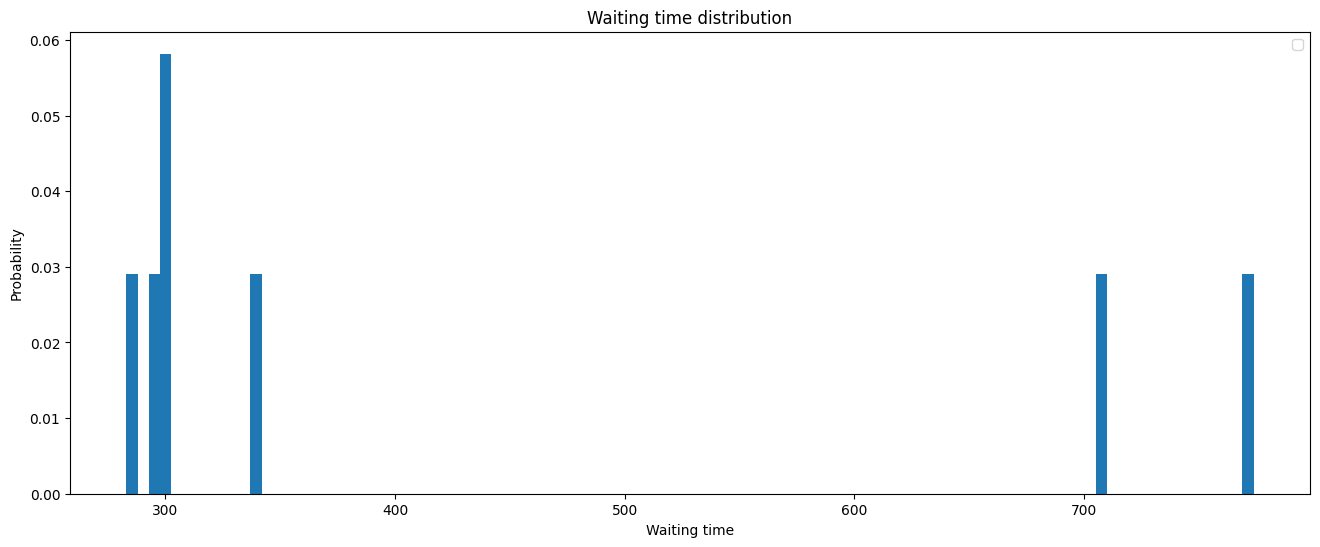

In [8]:
dec = 0
c_dec = lambda i : sigma_m * dec
c_ops = lambda i : [c_dec(i)]
#c_ops = [c_op(i) for i in range(N_t)]


measurment_strength = 0
c_w = lambda i : sigma_z * measurment_strength
sc_ops_w = lambda i : [c_w(i)]
#sc_ops_w = [sc_op_w(i) for i in range(N_t)]


gamma_decay = 0.3
c_c = lambda i : sigma_m * np.sqrt(gamma_decay)
sc_ops_c = lambda i : [c_c(i)]
#sc_ops_c = [sc_op_c(i) for i in range(N_t)]




e_ops = lambda i : [sigma_z]
#e_ops = [e_op(i) for i in range(N_t)]


rho_0 = qt.basis(N_dim, 1) * qt.basis(N_dim, 1).dag()


rabi = 2
detuning = 0

H_rabi = lambda i : rabi/2 * sigma_x + detuning/2 * sigma_z 
#H_pqs = [H_rabi(i) for i in range(N_t)]


counting = PQS.Experiment_simulation(H_rabi, rho_0, times, c_ops=c_ops, sc_ops_w=sc_ops_w, sc_ops_c=sc_ops_c, e_ops=e_ops) # not very elegant that one need to write the 1 at N_states

counting.solve_mixed()


#stoc_solution = qt.smesolve(H_pqs[0], rho_0, times, c_ops=c_ops[0], sc_ops=sc_ops_c[0], e_ops=e_ops[0], ntraj=1)

count_index = np.where(counting.dN[:, 0] == 1)[0]
#print(count_index)
waiting_time = np.diff(count_index)

fig, ax = plt.subplots(1, figsize=(16, 6))



ax.hist(waiting_time, bins=100, density=True)
ax.set_title('Waiting time distribution')
ax.set_xlabel('Waiting time')
ax.set_ylabel('Probability')

#ax.plot(times, counting.expectation, label='sigma_z')
#ax.plot(times, counting.dN[:, 0], label='clicks')
#ax.plot(times, stoc_solution.expect[0], label='stoc')
ax.legend()



# Test mixed solve

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   1.05s


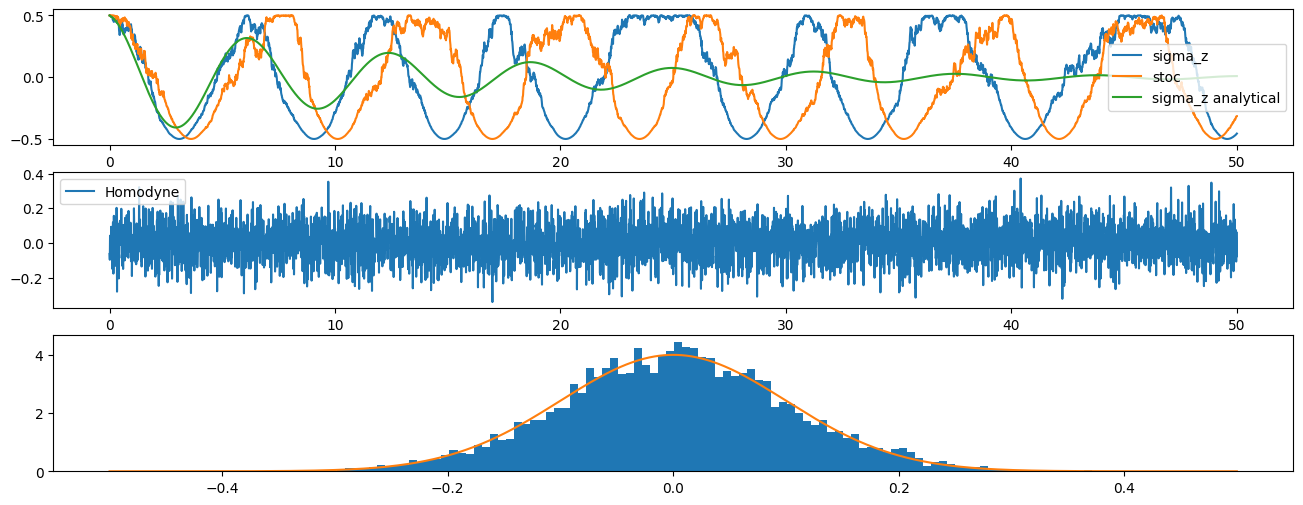

In [9]:
dec = 0
c_dec = lambda i : sigma_m * dec
c_ops = lambda i : [c_dec(i)]
#c_ops = [c_op(i) for i in range(N_t)]


measurment_strength = 0.1
c_w = lambda i : np.sqrt(measurment_strength) * sigma_m * np.exp(1j * np.pi / 2)
sc_ops_w = lambda i : [c_w(i)]
#sc_ops_w = [sc_op_w(i) for i in range(N_t)]


gamma_decay = 0
c_c = lambda i : sigma_m * np.sqrt(gamma_decay)
sc_ops_c = lambda i : [c_c(i)]
#sc_ops_c = [sc_op_c(i) for i in range(N_t)]




e_ops = lambda i : [sigma_z]
#e_ops = [e_op(i) for i in range(N_t)]


rho_0 = qt.basis(N_dim, 0) * qt.basis(N_dim, 0).dag()


rabi = 2
detuning = 0

H_rabi = lambda i : rabi/2 * sigma_x + detuning/2 * sigma_z 
#H_pqs = [H_rabi(i) for i in range(N_t)]


counting = PQS.Experiment_simulation(H_rabi, rho_0, times, c_ops=c_ops, sc_ops_w=sc_ops_w, sc_ops_c=sc_ops_c, e_ops=e_ops) # not very elegant that one need to write the 1 at N_states

counting.solve_mixed()

xx = np.linspace(-0.5, 0.5, 1000)

def test_gaussian(x, mu, sigma):
    return  1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))




stoc_solution = qt.smesolve(H_rabi(0), rho_0, times, c_ops=c_ops(0), sc_ops=sc_ops_w(0), e_ops=e_ops(0), ntraj=1)



c_ops_analytical = [c_dec(0), c_c(0), c_w(0)]
analytical = qt.mesolve(H_rabi(0), rho_0, times, c_ops=c_ops_analytical, e_ops=e_ops(0))

fig, ax = plt.subplots(3, figsize=(16, 6))


ax[0].plot(times, counting.expectation, label='sigma_z')
ax[0].plot(times, stoc_solution.expect[0], label='stoc')
ax[0].plot(times, analytical.expect[0], label='sigma_z analytical')
#ax.plot(times, counting.dN[:, 0], label='clicks')
ax[1].plot(times, counting.dY[:, 0], label='Homodyne')
ax[2].hist(counting.dY[:, 0], bins=100, density=True, label='Homodyne')
ax[2].plot(xx, test_gaussian(xx, 0, np.sqrt(dt)), label='Gaussian')

ax[0].legend()
ax[1].legend()





# Testing new Fisher information

In [10]:
alpha = 0 # splitting between homodyne and click, where alpha is the fraction of the click
gamma_decay = gamma
kappa = 0

#phi = np.pi/2
phi = 0



dec = 0
#c_dec = lambda i : sigma_m * np.sqrt(gamma_decay * kappa)
c_dec = lambda i : (sigma_x_1 + sigma_x_2) * np.sqrt(gamma_decay * kappa)
c_ops = lambda i : [c_dec(i)]
#c_ops = [c_op(i) for i in range(N_t)]

#c_dec_dif = lambda i : [0 * sigma_m * np.sqrt(gamma_decay * kappa)]
c_dec_dif = lambda i : [0 * (sigma_x_1 + sigma_x_2) * np.sqrt(gamma_decay * kappa)]
c_ops_dif = lambda t, i : [c_dec_dif(t)][i]
#c_ops_dif = [c_op_dif(i) for i in range(N_t)]




#c_w = lambda i : np.sqrt((1 - kappa) * (1 - alpha) * gamma_decay) * sigma_m * np.exp(phi * 1j)
#sc_ops_w = lambda t : [c_w(t)]
c_w_1 = lambda i : np.sqrt((1 - kappa) * (1 - alpha) * gamma_decay) * (sigma_x_1 + sigma_x_2) * np.exp(phi * 1j)
c_w_2 = lambda i : np.sqrt((1 - kappa) * (1 - alpha) * gamma_decay) * (sigma_y_1 + sigma_y_2) * np.exp(phi * 1j)
sc_ops_w = lambda t : [c_w_1(t), c_w_2(t)]

#sc_ops_w = [sc_op_w(i) for i in range(N_t)]

#c_w_dif = lambda t : [0 * np.sqrt((1 - kappa) * (1 - alpha) * gamma_decay) * sigma_m * np.exp(phi * 1j)]
#sc_ops_w_dif = lambda t, i : [c_w_dif(t)][i]
c_w_1_dif = lambda t : [0 * np.sqrt((1 - kappa) * (1 - alpha) * gamma_decay) * (sigma_x_1 + sigma_x_2) * np.exp(phi * 1j)]
c_w_2_dif = lambda t : [0 * np.sqrt((1 - kappa) * (1 - alpha) * gamma_decay) * (sigma_y_1 + sigma_y_2) * np.exp(phi * 1j)]
sc_ops_w_dif = lambda t, i : [c_w_1_dif(t), c_w_2_dif(t)][i]

#sc_ops_w_dif = [sc_op_w_dif(i) for i in range(N_t)]



#gamma_decay = 0#1/np.sqrt(2)
#c_c = lambda i : sigma_m * np.sqrt((1 - kappa) * gamma_decay * alpha)
#sc_ops_c = lambda t : [c_c(t)]
c_c_1 = lambda i : (sigma_x_1 + sigma_x_2) * np.sqrt((1 - kappa) * gamma_decay * alpha)
c_c_2 = lambda i : (sigma_y_1 + sigma_y_2) * np.sqrt((1 - kappa) * gamma_decay * alpha)
sc_ops_c = lambda t : [c_c_1(t), c_c_2(t)]
#sc_ops_c = [sc_op_c(i) for i in range(N_t)]

#c_c_dif = lambda t : [0 * sigma_m * np.sqrt((1 - kappa) * gamma_decay * alpha)]
#sc_ops_c_dif = lambda t, i : [c_c_dif(t)][i]
c_c_1_dif = lambda t : [0 * (sigma_x_1 + sigma_x_2) * np.sqrt((1 - kappa) * gamma_decay * alpha)]
c_c_2_dif = lambda t : [0 * (sigma_x_1 + sigma_x_2) * np.sqrt((1 - kappa) * gamma_decay * alpha)]
sc_ops_c_dif = lambda t, i : [c_c_1_dif(t), c_c_2_dif(t)][i]
#sc_ops_c_dif = [sc_op_c_dif(i) for i in range(N_t)]




#e_ops = lambda i : [sigma_z]
e_ops = lambda i : [sigma_z_1]

#e_ops = [e_op(i) for i in range(N_t)]




#rho_0 = qt.basis(N_dim, 1) * qt.basis(N_dim, 1).dag()

triplet_state_1 = qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 1))
triplet_state_2 = qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 0))
triplet_state_3 = 1/np.sqrt(2) * (qt.tensor(qt.basis(N_dim, 1), qt.basis(N_dim, 0)) + qt.tensor(qt.basis(N_dim, 0), qt.basis(N_dim, 1)))

triplet_rho_1 = triplet_state_1 * triplet_state_1.dag()
triplet_rho_2 = triplet_state_2 * triplet_state_2.dag()
triplet_rho_3 = triplet_state_3 * triplet_state_3.dag()

rho_0 = triplet_rho_1 + triplet_rho_2 + triplet_rho_3#state_0

rho_0 = rho_0 / rho_0.norm()

rabi = 2
detuning = 0

H_rabi = lambda i : rabi_n(i) * sigma_x + detuning/2 * sigma_z 
#H_pqs = [H_rabi(i) for i in range(N_t)]


H_1 = lambda i : 1/2 * sigma_z_1 * rabi_n(i) 
H_2 = lambda i : 1/2 * sigma_z_2 * rabi_n(i)

H_mag = lambda i : H_1(i) + H_2(i)


H_rabi_dif = lambda t, i : [sigma_x + detuning/2 * sigma_z][i] 
#H_pqs_dif = [H_rabi_dif(i) for i in range(N_t)]

peram_number = 1
N_fisher = 10

Fisher = PQS.Experiment_Fisher_estimation(H_mag, rho_0, times, c_ops, sc_ops_w, sc_ops_c, e_ops, peram_number, c_ops_dif, H_rabi_dif, sc_ops_w_dif, sc_ops_c_dif)

Fisher_information, Fisher_information_error, rho_it_tr = Fisher.calculate_fisher_information_mixed(N_fisher)




H_dif Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.  0.5]
 [0.5 0. ]]
c_ops Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
c_ops_dif Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


ValueError: incompatible dimensions [[2], [2]] and [[2, 2], [2, 2]]

a_fit 0.2743835471471958


/tmp/ipykernel_103764/2252325791.py:81: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(np.pi * a) * np.exp(-a * x**2)
/tmp/ipykernel_103764/2252325791.py:81: RuntimeWarning: overflow encountered in exp
  return 2 * np.sqrt(np.pi * a) * np.exp(-a * x**2)


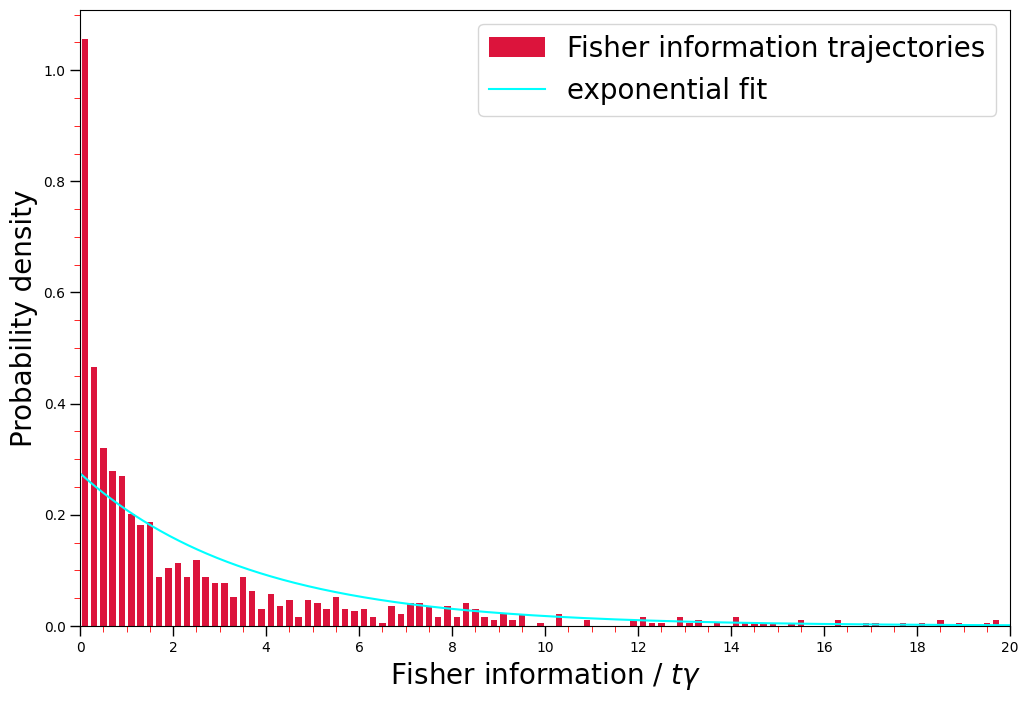

In [ ]:
from iminuit import Minuit
from iminuit.cost import LeastSquares, UnbinnedNLL

def fit_func(t, a):
    return a * np.exp(-a * t)

a_guess = 0.1
b_guess = 0.1




rho_tr = np.zeros(N_t)

for i in range(N_t):
    rho_tr[i] = Fisher.rho[i].tr()

#fig, ax = plt.subplots(1, figsize=(12, 8))
#ax.plot(times, Fisher.normfactor, label='rho unnormelized tr', color='red')
#ax.set_yscale('log')
#ax.plot(times, rho_tr, label='rho tr', color='blue')
#ax.legend(fontsize=20)


fig, ax = plt.subplots(1, figsize=(12, 8))


ax.plot(times, rho_it_tr[0] * rho_it_tr[0], color='lime', alpha=0.01)

ax.plot(times, np.zeros(N_t), color='lime', alpha=0.01, label='Fisher information trajectories')

ax.set_ylim(0, 1.2 * 4 * t_gamma / gamma_decay)
ax.set_xlim(0, t_gamma)

ax.fill_between(times, Fisher_information[0, 0] - Fisher_information_error[0, 0], Fisher_information[0, 0] + Fisher_information_error[0, 0], alpha=0.5, color='deeppink', label='Fisher information error')
ax.plot(times, 4 * times / gamma_decay, color='aqua', label='Quantum fisher information')
ax.plot(times, Fisher_information[0, 0], label='Fisher information', color='crimson')
ax.set_xlabel('$t \gamma$', fontsize=20)
ax.set_ylabel('Fisher information', fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
    #ax.xaxis.set_major_formatter('{x:.0f}')

ax.tick_params(which='major', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

#ax2 = ax.twinx()

#ax2.plot(times, rabi * np.sin(times), color='black', label='rabi')
#ax2.legend()

ax.legend(fontsize=20)
#fig.savefig(f'Fisher_information_N_{N_fisher}_alpha_{alpha}_st_{st}.png')

"""


bin_range = 20
bin_number = 100
 
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.hist(rho_it_tr[0, -1] * rho_it_tr[0,-1] / t_gamma, bins=bin_number, range=(0, bin_range), density=True, label='Fisher information trajectories', color='crimson', rwidth=0.7)

hight, bin_edge = np.histogram(rho_it_tr[0, -1] * rho_it_tr[0,-1] / t_gamma, bins=bin_number, range=(0, bin_range), density=True)

y_data = hight
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data_err = np.sqrt(hight)
y_data_err[y_data_err == 0] = 0.5

least_squares = LeastSquares(x_data, y_data, y_data_err, fit_func)

Fisher_information_fit_data = rho_it_tr[0, -1] * rho_it_tr[0,-1] / t_gamma


def gauss(x, a):

    return 2 * np.sqrt(np.pi * a) * np.exp(-a * x**2)


@np.vectorize
def poisson(k, lambda_):
    k = np.round(k).astype(int)
    return lambda_ ** k * np.exp(-lambda_) / (math.factorial(k))

lambda_guess = 3

#p = UnbinnedNLL(Fisher_information_fit_data, poisson)

c = UnbinnedNLL(Fisher_information_fit_data, fit_func)

m = Minuit(c, a=a_guess)

#m_p = Minuit(p, lambda_=lambda_guess)

#m_p.migrad()

m.migrad()

a_fit = m.values[0]

#lambda_fit = m_p.values[0]

print('a_fit', a_fit)
#print('lambda_fit', lambda_fit)


c_power = UnbinnedNLL(Fisher_information_fit_data, gauss)

a_guess_power = 1
k_guess_power = 2

m_power = Minuit(c_power, a=a_guess_power)

m_power.migrad()

a_fit_power = m_power.values[0]
#k_fit_power = m_power.values[1]


#print('k_fit_power', k_fit_power)

xp = np.arange(bin_range * 5)
xx = np.linspace(0, bin_range, 1000)
ax.plot(xx, fit_func(xx, a_fit), label='exponential fit', color='aqua')

#ax.plot(xp, poisson(xp, lambda_guess), label='poisson fit', color='gold')


ax.legend(fontsize=20)
ax.set_xlabel('Fisher information / $t \gamma$', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_xlim(0, bin_range)

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    #ax.xaxis.set_major_formatter('{x:.0f}')

ax.tick_params(which='major', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(0, np.max(hight) * 1.2)
fig.savefig(f'Fisher_information_histogram_N_{N_fisher}_alpha_{alpha}_st_{st}.png')


"""


## Statistics for changing loss rate

In [ ]:
def fisher_trial(N_fisher, kappa, alpha):
   
    gamma_decay = gamma
    

    phi = np.pi/2



    
    c_dec = lambda i : sigma_m * np.sqrt(gamma_decay * kappa)
    c_ops = lambda i : [c_dec(i)]
    #c_ops = [c_op(i) for i in range(N_t)]

    c_dec_dif = lambda i : [0 * sigma_m * np.sqrt(gamma_decay * kappa)]
    c_ops_dif = lambda t, i : [c_dec_dif(t)][i]
    #c_ops_dif = [c_op_dif(i) for i in range(N_t)]




    c_w = lambda i : np.sqrt((1 - kappa) * (1 - alpha) * gamma_decay) * sigma_m * np.exp(phi * 1j)
    sc_ops_w = lambda t : [c_w(t)]
    #sc_ops_w = [sc_op_w(i) for i in range(N_t)]

    c_w_dif = lambda t : [0 * np.sqrt((1 - kappa) * (1 - alpha) * gamma_decay) * sigma_m * np.exp(phi * 1j)]
    sc_ops_w_dif = lambda t, i : [c_w_dif(t)[i]]
    #sc_ops_w_dif = [sc_op_w_dif(i) for i in range(N_t)]



    #gamma_decay = 0#1/np.sqrt(2)
    c_c = lambda i : sigma_m * np.sqrt((1 - kappa) * gamma_decay * alpha)
    sc_ops_c = lambda t : [c_c(t)]
    #sc_ops_c = [sc_op_c(i) for i in range(N_t)]

    c_c_dif = lambda t : [0 * sigma_m * np.sqrt((1 - kappa) * gamma_decay * alpha)]
    sc_ops_c_dif = lambda t, i : [c_c_dif(t)][i]
    #sc_ops_c_dif = [sc_op_c_dif(i) for i in range(N_t)]




    e_ops = lambda i : [sigma_z]
    #e_ops = [e_op(i) for i in range(N_t)]


    rho_0 = qt.basis(N_dim, 1) * qt.basis(N_dim, 1).dag()


    rabi = 2
    detuning = 0

    H_rabi = lambda i : rabi_n(i) * sigma_x + detuning/2 * sigma_z 
    #H_pqs = [H_rabi(i) for i in range(N_t)]

    H_rabi_dif = lambda t, i : [sigma_x + detuning/2 * sigma_z][i] 
    #H_pqs_dif = [H_rabi_dif(i) for i in range(N_t)]

    peram_number = 1
    

    Fisher = PQS.Experiment_Fisher_estimation(H_rabi, rho_0, times, c_ops, sc_ops_w, sc_ops_c, e_ops, peram_number, c_ops_dif, H_rabi_dif, sc_ops_w_dif, sc_ops_c_dif)

    Fisher_information, Fisher_information_error, rho_it_tr = Fisher.calculate_fisher_information_mixed(N_fisher)
    return Fisher_information[0, 0, -1], Fisher_information_error[0, 0, -1]


alpha = 0
N_fisher = 100
N_points = 10
kappa_list = np.linspace(0, 1, N_points, endpoint=True)

Fisher_info_0 = np.zeros(N_points)
Fisher_info_error_0 = np.zeros(N_points)
for i in range(N_points):
    Fisher_info_0[i], Fisher_info_error_0[i] = fisher_trial(N_fisher, kappa_list[i], alpha)

alpha = 0.5
Fisher_info_05 = np.zeros(N_points)
Fisher_info_error_05 = np.zeros(N_points)
for i in range(N_points):
    Fisher_info_05[i], Fisher_info_error_05[i] = fisher_trial(N_fisher, kappa_list[i], alpha)

alpha = 1
Fisher_info_1 = np.zeros(N_points)
Fisher_info_error_1 = np.zeros(N_points)
for i in range(N_points):
    Fisher_info_1[i], Fisher_info_error_1[i] = fisher_trial(N_fisher, kappa_list[i], alpha)




/tmp/ipykernel_341249/2853762657.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  Fisher_info_0[i], Fisher_info_error_0[i] = fisher_trial(N_fisher, kappa_list[i], alpha)
/tmp/ipykernel_341249/2853762657.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  Fisher_info_05[i], Fisher_info_error_05[i] = fisher_trial(N_fisher, kappa_list[i], alpha)
/tmp/ipykernel_341249/2853762657.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  Fisher_info_1[i], Fisher_info_error_1[i] = fisher_trial(N_fisher, kappa_list[i], alpha)


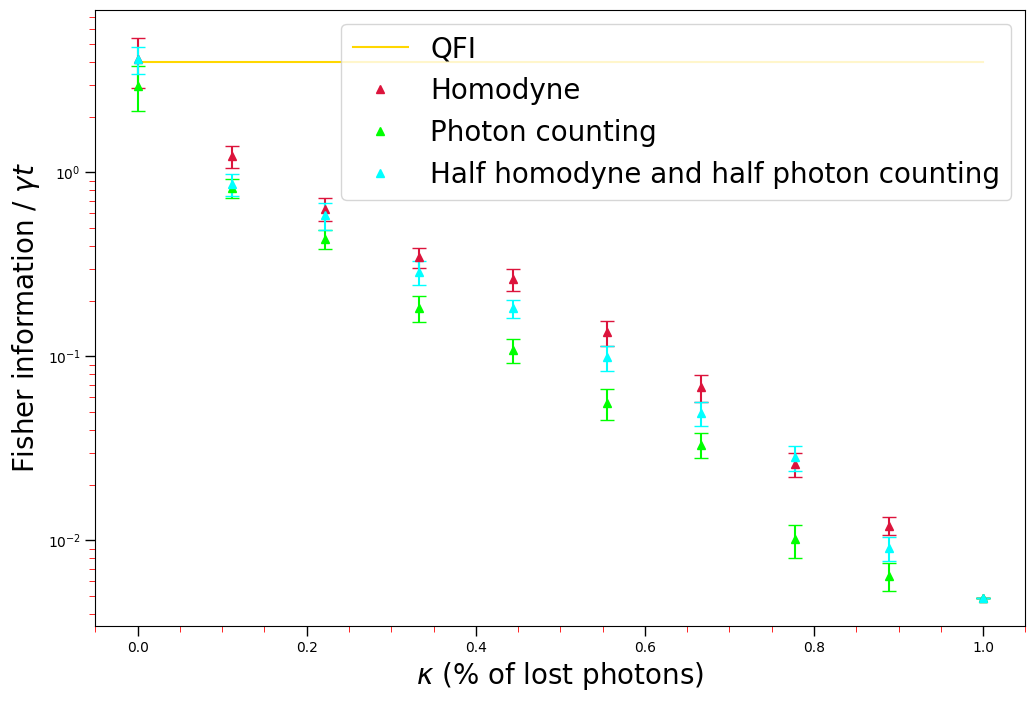

In [ ]:


fig, ax = plt.subplots(figsize=(12,8))

ax.plot(kappa_list, 4 / gamma * np.ones_like(kappa_list), color='gold', label='QFI')
ax.errorbar(kappa_list, Fisher_info_0 / t_gamma, yerr=Fisher_info_error_0 / t_gamma, fmt=' ', capsize=5, color='crimson')
ax.errorbar(kappa_list, Fisher_info_1 / t_gamma, yerr=Fisher_info_error_1 / t_gamma, fmt=' ', capsize=5, color='lime')
ax.errorbar(kappa_list, Fisher_info_05 / t_gamma, yerr=Fisher_info_error_05 / t_gamma, fmt=' ', capsize=5, color='aqua')
ax.plot(kappa_list, Fisher_info_0 / t_gamma, '^', color='crimson', label='Homodyne')
ax.plot(kappa_list, Fisher_info_1 / t_gamma, '^', color='lime', label='Photon counting')
ax.plot(kappa_list, Fisher_info_05 / t_gamma, '^', color='aqua', label='Half homodyne and half photon counting')

ax.set_yscale('log')

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
#ax.yaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(.2))
    #ax.xaxis.set_major_formatter('{x:.0f}')

ax.tick_params(which='major', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

ax.set_xlabel('$\kappa$ ($\%$ of lost photons)', fontsize=20)
ax.set_ylabel('Fisher information / $\gamma t$', fontsize=20)

ax.legend(fontsize=20)
fig.savefig(f'Fisher_loss_plot_N_fisher_{N_fisher}_N_points_{N_points}.png')
plt.show()

# Calculating the Fisher information

In [ ]:







if entaglement == 'single':
    c_single_dif = lambda i : [qt.qzero_like(sigma_x)]
    c_op_dif = lambda i : [c_single_dif(i)]
    c_ops_dif = [c_op_dif(i) for i in range(N_t)]
elif entaglement == 'rabi':
    c_rabi_dif = lambda i: [qt.qzero_like(sigma_x)]
    c_op_dif = lambda i : [c_rabi_dif(i)]
    c_ops_dif = [c_op_dif(i) for i in range(N_t)]
else:
    c_1_dif = lambda i : [qt.qzero_like(sigma_x_1)]
    c_2_dif = lambda i : [qt.qzero_like(sigma_x_2)]
    c_op_dif = lambda i : [c_1_dif(i), c_2_dif(i)]
    c_ops_dif = [c_op_dif(i) for i in range(N_t)]



c_ops_dif = np.swapaxes(c_ops_dif, 1, 2)




c_out_1_dif = lambda i : [qt.qzero_like(sigma_x_1)]
c_out_1_e_dif = lambda i : [qt.qzero_like(sigma_x_1)]
c_out_1_bell_dif = lambda i : [qt.qzero_like(sigma_x_1)]
c_out_single_dif = lambda i : [qt.qzero_like(sigma_x)]

c_out_2_dif = lambda i : [qt.qzero_like(sigma_x_1)]
c_out_2_e_dif = lambda i : [qt.qzero_like(sigma_x_1)]
c_out_2_bell_dif = lambda i : [qt.qzero_like(sigma_x_1)]

if entaglement == 'entaglement':
    sc_op_dif = lambda i : [c_out_1_e_dif(i), c_out_2_e_dif(i)]
elif entaglement == 'bell':
    sc_op_dif = lambda i : [c_out_1_bell_dif(i), c_out_2_bell_dif(i)]
elif entaglement == 'single':
    sc_op_dif = lambda i : [c_out_single_dif(i)]
elif entaglement == 'rabi':
    sc_op_dif = lambda i : [c_rabi_dif(i)]
else:
    sc_op_dif = lambda i : [c_out_1_dif(i), c_out_2_dif(i)]




sc_ops_dif = [sc_op_dif(i) for i in range(N_t)]

sc_ops_dif = np.swapaxes(sc_ops_dif, 1, 2)



H_1_dif = lambda i : [1/2 * (sigma_z_1) * Delta_n_1_0[i]] 
H_2_dif = lambda i : [1/2 * (sigma_z_2) * Delta_n_2_0[i]]
H_single_dif = lambda i : [1/2 * (sigma_z) * Delta_n_1_0[i]]
H_rabi_dif = lambda i : [1/2 * sigma_x]

if entaglement == 'single':
    H_pqs_dif = [H_single_dif(i) for i in range(N_t)]
elif entaglement == 'rabi':
    H_pqs_dif = [H_rabi_dif(i) for i in range(N_t)]
else:
    H_pqs_dif = [H_1_dif(i) + H_2_dif(i) for i in range(N_t)]




param_number = 1


N_fisher = 1

#print('rho_0', rho_0)

#print('H_pqs', H_pqs[0])
#print('rho_0', rho_0)
#print('c_ops', c_ops[0])
#print('sc_ops', sc_ops[0])
#print('e_ops', e_ops[0])
#print('c_ops_dif', c_ops_dif[0])
#print('sc_ops_dif', sc_ops_dif[0])
#print('H_pqs_dif', H_pqs_dif[0])




Fisher = PQS.Experiment_Fisher_estimation(H_pqs, rho_0, times, c_ops=c_ops, sc_ops=sc_ops, e_ops=e_ops, c_ops_dif=c_ops_dif, sc_ops_dif=sc_ops_dif, H_dif=H_pqs_dif, peram_number=param_number, timedependent_H=True)
if entaglement == 'rabi':
    Fisher_information, Fisher_information_error, d_rho_i_tr, termes, rho_i_tr = Fisher.calculate_fisher_information(N_fisher, sigma_z_1, type_='counting')
else:
    Fisher_information, Fisher_information_error, d_rho_i_tr, termes, rho_i_tr = Fisher.calculate_fisher_information(N_fisher, sigma_z_1)


plt.plot(times, Fisher.expectation[:,-2], label='sigma_z_1')
plt.plot(times, Fisher.expectation[:,-1], label='sigma_z_2')
plt.legend()
plt.show()

save_rho_tr = True
date = '_24_02_2025'
number = '_number_1'

if save_rho_tr:
    np.save('rho_i_tr' + date + number, rho_i_tr)
    





TypeError: Experiment_Fisher_estimation.__init__() got an unexpected keyword argument 'sc_ops'

/home/sk0rt3/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


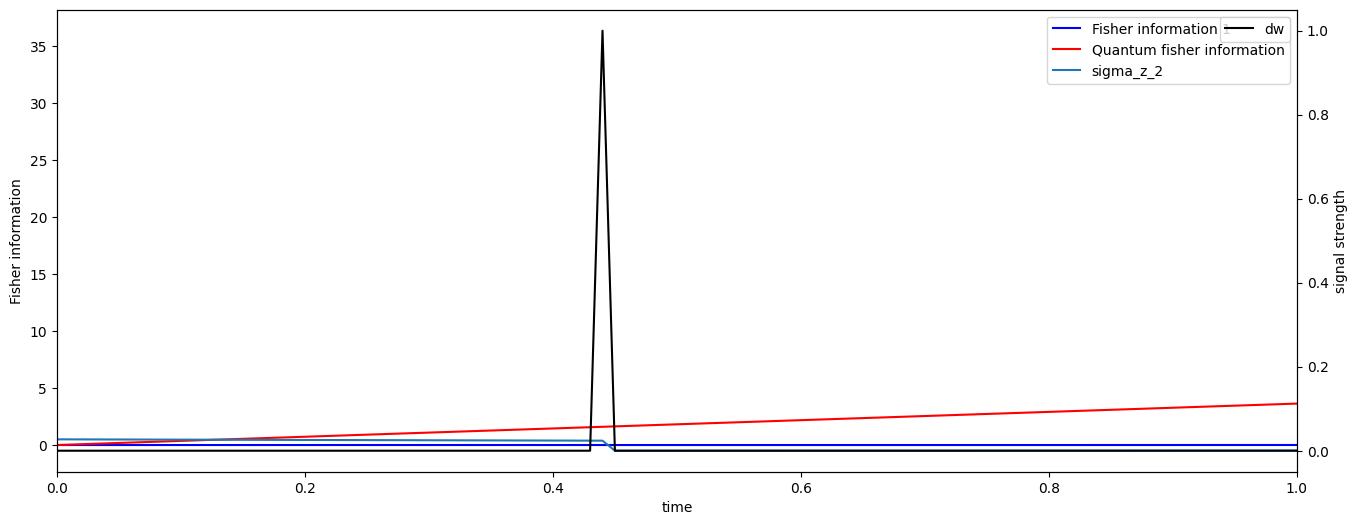

In [ ]:
#print(np.shape(d_rho_i_tr))
def trace_2(i):
    trace = (Fisher.rho[i] * Fisher.rho[i]).tr()
    return trace

times_gamma = times * gamma 



purety = np.array([trace_2(i) for i in range(N_t)])
purety_mask = purety >= 0.999
#print('fisher', np.shape(Fisher_information))
rho_i_tr = rho_i_tr.reshape((N_t, N_fisher))
#print('fisher rho', np.shape(rho_i_tr))

Fisher_information_cum = np.cumsum(Fisher_information, axis=2)

termes_labels = np.array(['Hamiltonin', 'c_ops_D_1','sc_ops_D_1', 'sc_ops_H_1'])


fisher_errror_sip = np.ravel([Fisher_information_error * np.sqrt(10) + Fisher_information, Fisher_information - Fisher_information_error * np.sqrt(10)], order='F')
time_sip = np.ravel([times, times], order='F')



fig, ax1 = plt.subplots(1, figsize=(16, 6))
ax1.plot(times[purety_mask], Fisher_information[0, 0, purety_mask], color='blue', label='Fisher information 1')
ax1.plot(times, 2 * times / gamma_rabi, color='red', label='Quantum fisher information')


#ax1.plot(time_sip[purety_mask], fisher_errror_sip[purety_mask], label='Fisher information_error', color='red', alpha=0.4)

ax2 = ax1.twinx()
#ax2.plot(times[purety_mask], Delta_n_1[purety_mask], label='theta_1', color='Green')
ax1.set_ylabel('Fisher information')
ax2.set_ylabel('signal strength')
ax1.set_xlabel('time')
ax2.plot(times, Fisher.dw, label='dw', color='black')
ax1.set_xlim(0, 1)
ax1.plot(times, Fisher.expectation[:,-1], label='sigma_z_2')

#ax2.plot(times[purety_mask], purety[purety_mask], color='orange', label='purety')
#ax1.plot(times, np.exp(times), color='black', label='exponential')

#ax1.set_yscale('log')
#ax1.set_xscale('log')
#plt.plot(times, rho_i_tr, color='blue', alpha=0.1)
#plt.plot(times, np.mean(rho_i_tr, axis=1), color='red', label='mean rho_i_tr trajectory')
#plt.plot(times, Fisher_information[:, 1, 1], label='Fisher information 2')
#plt.plot(times, Fisher_information_cum[:, 0, 0], label='Fisher information cummulative')


#plt.plot(times, d_rho_i_tr[:,], label='d_rho_i_tr')
#plt.plot(times, rho_i_tr[:,-1], label='rho_i_tr')
#plt.plot(times, Fisher_information_error[:, 0, 0] + Fisher_information[:, 0, 0], alpha=0.1, label='Fisher information error')
#plt.plot(times, d_rho_i_tr[:, 0], alpha=0.5, label='d_rho_i_tr')


#plt.show()

#dw_label = np.array(['dw_1', 'dw_2'])
#plt.plot(times, Fisher.dw, label=dw_label)
#plt.legend()
#plt.show()
def fisher_fit(t, a, b, c):
    fisher = (a * t) ** b + c
    return fisher



a_guess = 0.6
b_guess = 1.7
c_guess = -266


y_fit = fisher_fit(times[purety_mask], a_guess, b_guess, c_guess)

#ax1.plot(times[purety_mask], y_fit, label='fit')

ax1.legend()
ax2.legend()


#print(Fisher_information[:50])





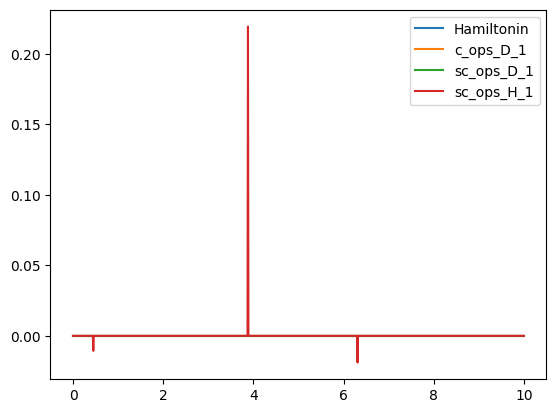

In [ ]:
plt.plot(times, termes[:,], label=termes_labels)
plt.legend()
plt.show()

In [ ]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [ ]:



least_squares = LeastSquares(times[purety_mask], Fisher_information[0, 0, purety_mask], Fisher_information_error[0, 0, purety_mask], fisher_fit)

m = Minuit(least_squares, a=a_guess, b=b_guess, c=c_guess)

m.migrad()

a_fit = m.values[0]
b_fit = m.values[1]
c_fit = m.values[2]

print('a_fit : ', a_fit, '+- ', m.errors[0])
print('b_fit : ', b_fit, '+- ', m.errors[1])
print('c_fit : ', c_fit, '+- ', m.errors[2])

y_fit = fisher_fit(times, a_fit, b_fit, c_fit)

QFI = 2 * times / gamma_rabi


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/iminuit/cost.py:2530: ComplexWarning: Casting complex values to real discards the imaginary part
  value = value.astype(np.float64)


a_fit :  0.6 +-  nan
b_fit :  1.7 +-  nan
c_fit :  -266.0 +-  nan


[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j
 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j
 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j
 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j
 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j 0.00011289-0.j
 0.00011289-0.j 0.000112

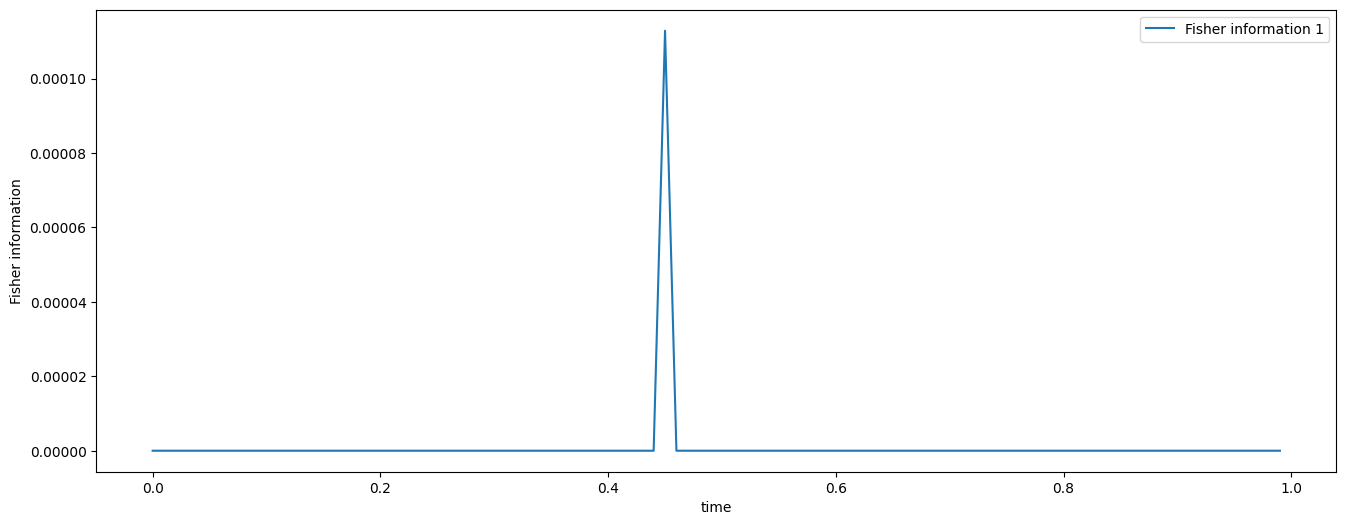

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 6))
#ax.plot(times[purety_mask], Fisher_information[0, 0, purety_mask], color='blue', label='Fisher information 1')
#ax.plot(time_sip, fisher_errror_sip, label='Fisher information_error', color='red', alpha=0.4)
#ax.plot(times, QFI, label='QFI', color='green')
#ax.plot(times, rho_i_tr ** 2, label='trajectories', alpha=0.4)
#ax.plot(times[purety_mask], y_fit[purety_mask], label='fit', color='green')
ax.plot(times[:100], d_rho_i_tr[:100, 0] ** 2, label='Fisher information 1')

print(rho_i_tr[:100, 0] ** 2)
#ax_1 = ax.twinx()
#ax_1.plot(times[purety_mask], purety[purety_mask], color='orange', label='purety')
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.text(0.1, 0.5, 
#        'a_fit : ' + str(a_fit) + '+- ' + str(m.errors[0]) + '\n' + 
#        'b_fit : ' + str(b_fit) + '+- ' + str(m.errors[1]) + '\n' + 
#        'c_fit : ' + str(c_fit) + '+- ' + str(m.errors[2]) + '\n' +
#        'theta_1 : ' + str(B_1) + '\n' +
#        'theta_2 : ' + str(B_2) + '\n' +
#        'signal_type : ' + signal_type, transform=ax.transAxes)

ax.set_ylabel('Fisher information')
ax.set_xlabel('time')
#ax_1.set_ylabel('purety')
#ax_1.legend()
ax.legend()
#ax.set_ylim(0, 10000)

#fig.savefig('Fisher_information_fit_6_2_no_4.png')




In [ ]:
test_array = np.array([3.3, 2.2])
rounded = np.round(test_array).astype(int)


print(rounded)

[3 2]
